# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = x^2+3x^2*ln(x)$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [ ]:
import math
def dy(x_0):
    """
    Реализуйте функцию
    """
    return (x_0**2) + 3*(x_0**2)*math.log(x_0)

In [ ]:
dy(3.0)


38.66253179403897

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
import numpy as np

def get_min_with_gd(x_0, dy,lr=0.01, tolerance=0.0001, n_iters=10000):

    w = np.array(x_0) # Список точек, полученных на каждом шаге
    #запись каждого шага в формате [шаг1:[точка1.1, ...], шаг2: точка2.1, ...].
    history = [w]
    for num in tqdm(range(n_iters)):
        # Вычисляем градиент в точке x
        gradient = dy(w)
       # Итерация градиентного спуска
        w = w -  lr * gradient / np.linalg.norm(gradient)

        # Сохраняем новые аргументы в историяю
        history.append(w)


        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.mean(abs(w - history[-2])) < tolerance:
            print('Iteration number, dot :', num,' ', w )
            break

    return np.array(history)

In [ ]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(10,dy, lr=0.001, n_iters=10000)

100%|██████████| 10000/10000 [00:00<00:00, 73909.48it/s]


In [ ]:
 history  # Минимум x=0,716  см ниже

array([10.   ,  9.999,  9.998, ...,  0.716,  0.717,  0.716])

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

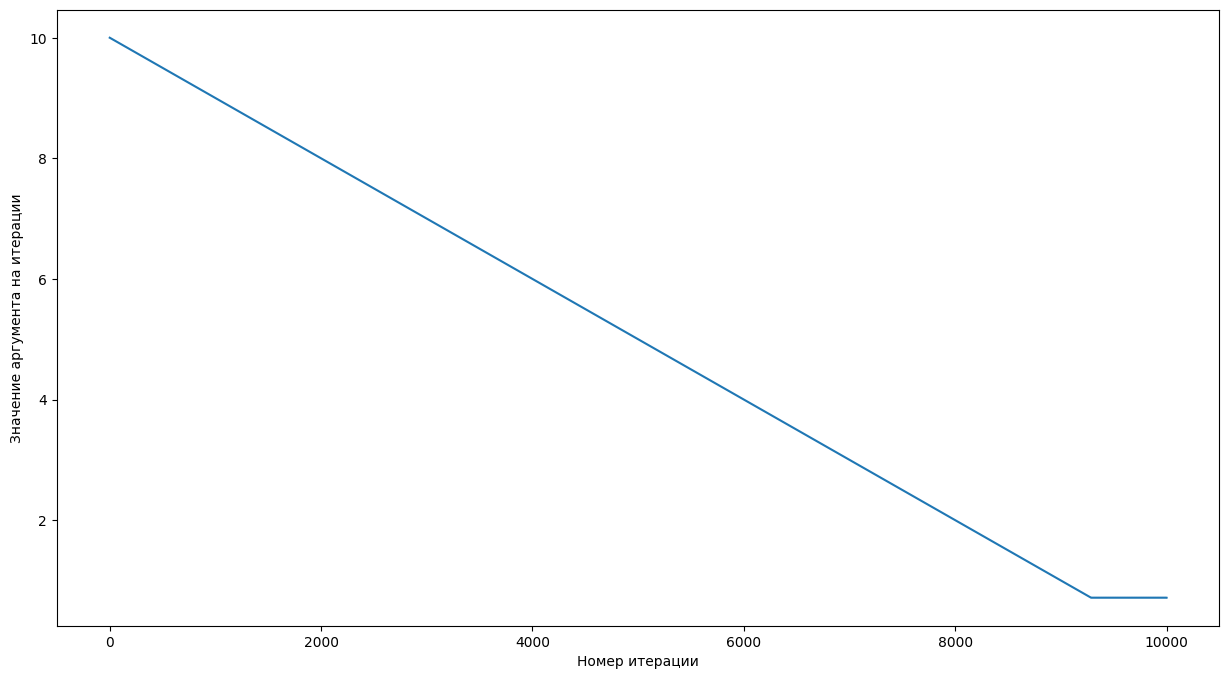

In [ ]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

Аналитически минимум в точке(  $y'(x) = x^2+3x^2*ln(x) =0$)  Это точка $1/e^3$ $ , -1/3e$  Что действиетельно = ~0.716; ~0.9243

Что совпадает с картинкой

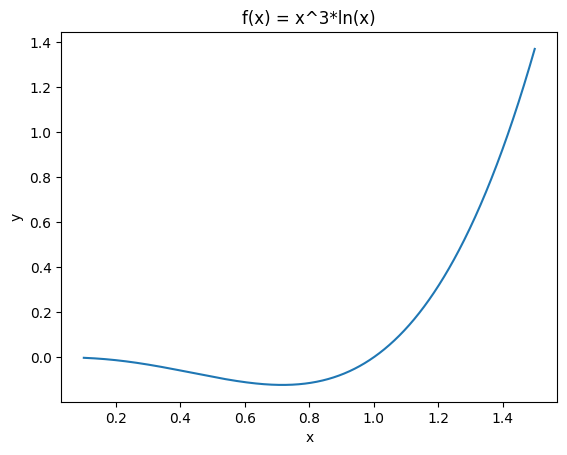

In [ ]:
def f(x):
    return x**3 * np.log(x)

x = np.linspace(0.1, 1.5, 1000)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = x^3*ln(x)')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [ ]:
import numpy as np
from tqdm import tqdm

# Функция для поиска минимума функции при помощи RMSProp
def get_min_with_rmsprop(x0, dy, lr=0.001, beta=0.9, eps=0.0001, threshold=0.00001, n_iter=10000):

    # Инициализация начальных значений переменных
    w = np.array(x0)+eps
    history = [w]
    f_grad = [dy(w)]
    gamma = np.zeros_like(w)

    # Итерация по алгоритму RMSProp
    for i in tqdm(range(n_iter)):

        # Рассчитываем градиент и скользящее среднее градиента
        gradient = dy(w)
        gamma = (1-beta) * gamma + beta * np.square(gradient)

        # Рассчитываем шаг оптимизации и обновляем веса
        step = (lr * gradient)/ np.sqrt(gamma + eps)
        w -= step

        # Добавляем значения градиента и весов в списки для построения графика
        f_grad.append(dy(w))
        history.append(w)

        # Проверка на достижение заданного порога точности
        if np.mean(abs(step)) < threshold:
            print('Found:', w - history[-2], '<', threshold)
            break

    return history, f_grad


In [ ]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop0 = get_min_with_rmsprop(0, dy)
print('Минимум функции:', history[-1], 'Градиент:',f_grad[-1])
history_rmsprop2= get_min_with_rmsprop(2, dy)
print('Минимум функции:', history[-1], 'Градиент:',f_grad[-1])


  0%|          | 0/10000 [00:00<?, ?it/s]


Found: 2.6631021107426296e-08 < 1e-05
Минимум функции: [0.71656402] Градиент: [7.03188226e-05]


 13%|█▎        | 1302/10000 [00:00<00:00, 58247.39it/s]

Found: -9.384036137594087e-06 < 1e-05
Минимум функции: [0.71656402] Градиент: [7.03188226e-05]


6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

Почему то столбики с процентами странно выглядят, хотя значения правильные, и до конца не дорисовывает точки :/ Хотя вроде все верно(?)

  5%|▌         | 541/10000 [00:00<00:00, 32001.33it/s]

Found: -9.230774465907032e-06 < 1e-05


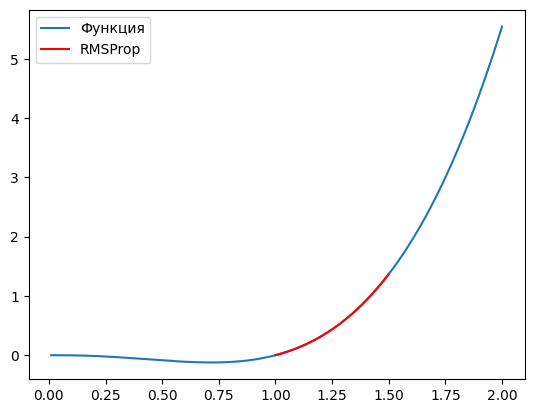

In [ ]:

history, f_grad = get_min_with_rmsprop(x0=1.5, dy=f)
x = np.linspace(0.01, 2, 1000)
# Создание графика функции
plt.plot(x, f(x), label='Функция')

# Отображение пути, пройденного алгоритмом RMSProp
plt.plot(history, f_grad, c='r', label='RMSProp')

# Добавление легенды
plt.legend(loc='best')

# Отображение графика
plt.show()


